# Imports

In [1]:
import shapefile

import geometry as gm
import nav_graph as ng
import renderer as rnd
import shape_helper as sh

# Set up navigation graph

In [2]:
TRANSPORT_DIR = 'data/VMTRANS2/'
sf = shapefile.Reader(TRANSPORT_DIR + 'TR_ROAD')
asrs = sh.all_srs(sf)

In [3]:
ngraph = ng.NavGraph(asrs)

In [4]:
def geom_length_attr_fn(graph, srs):
    gids = [graph.edges[e]['gid'] for e in graph.edges]
    return [gm.geom_length(sh.get_geom(srs[g])) for g in gids]

In [5]:
ngraph.set_edge_attributes(geom_length_attr_fn, 'gl')

# Determine a route between two nodes

In [6]:
import random

nodes = list(ngraph.g.nodes())
sn = random.choice(nodes) # 333 # 58088
en = random.choice(nodes) # 398 # 645752

In [7]:
np_hops = ngraph.shortest_path(sn, en)
np_gl = ngraph.shortest_path(sn, en, weight='gl')

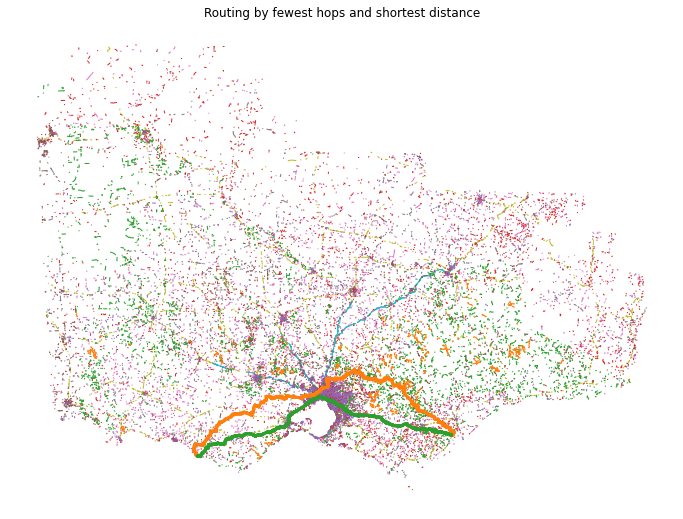

In [8]:
import matplotlib.pyplot as plt

fig, ax = rnd.init_fig()
#draw_graph(G)
#draw_path(G, path_hops)
#draw_path(G, path_geom_length, color='tab:green')
rnd.draw_path_geoms(ax, np_hops, color='tab:orange')
rnd.draw_path_geoms(ax, np_gl, color='tab:green')
rnd.plot_srs(ax, asrs, decay=1)
plt.axis('off')
plt.title('Routing by fewest hops and shortest distance')
plt.show()